
# <div align="center"> SPECIAL TOPICS III </div>
## <div align="center"> Data Science for Social Scientists  </div>
### <div align="center"> ECO 4199 </div>
#### <div align="center">Class 5 - Introduction to Prediction</div>
<div align="center"> Jonathan Holmes, (he/him)</div>

## From now on, we cover Statistical Learning
- For almost all lectures we will follow closely the book [Introduction to Statistical Learning](http://faculty.marshall.usc.edu/gareth-james/) 2nd edition
- Coding will no longer be at the heart of what we are doing.
- But we will illustrate intuitions using code.
- Unlike before, the code will already be made available to you. You will only need to run it.
    - Some of this code is coming from this [set of scripts](https://github.com/JWarmenhoven/ISLR-python)

##  Roadmap: What we'll see in the rest of this course

1. This class: Introduction to ML terms, how to evaluate models
2. Linear Regression: Your econometrics class re-interpreted
3. Classification: Predicting Y when it is a Boolean
4. Re-sampling: Clever ways of using random samples
5. Model Selection: Better linear models for prediction
6. Deep Learning: The hottest thing in Silicon Valley
7. Social Bias and Prediction: What's wrong with ML? 

## Prediction: Is my house on fire?

<div align="center"> <img src="Smoke_detector.JPG" /> </div>

## A Simple Fire Alarm
#### 


<div align="center"> Smoke sensor --> Fire Detection Algorithm --> Is there a fire? </div>

Simple fire detection algorithm: 
- The alarm rings if smoke > some threshold ($\alpha$)
- Alarm company chooses $\alpha$ to make accurate predictions


Notation: 
- Smoke sensor measures $x$
- Fire detection algorithm: $\hat{f}(x) = x > \alpha$
- Output: $\hat{y} = \hat{f}(x)$


## A Simple Fire Alarm
#### 


<div align="center"> Smoke sensor --> Fire Detection Algorithm --> Is there a fire? </div>


True relationship:
<div align="center">  $x \, \,$ --> $\, \,f(x)\, \,$ -- > $\, \,y$ </div>

Estimated relationship:
<div align="center">  $x \, \,$ --> $\, \, \hat{f}(x) = x > \alpha \, \,$ --> $\, \, \hat{y}$ </div>

- $x$ is an _input variable_ (also known as predictors, indpendent variables, features)
- $y$ is an _output variable_ (also known as response or dependent variable)
- $f(x)$ is some function linking $x$ to $y$
- $\alpha$ is a _parameter_ 
- $\hat{y}$ and $\hat{f}$ are _estimates_ (Or predicted values)

## A Complicated fire alarm


- We can have many sensors: Heat, noise, smoke, light, etc. 
- Call these $x_1$, $x_2$, $x_3$, $x_4$, etc. 
- True relationship: $y = f(x_1, x_2, x_3, x_4) + \varepsilon$ 
- $\varepsilon$ is a random error term. 


Question: In general, we don't know $f$. How do we figure out what it is?  

Notation: 
- Bold face variables are _vectors_
- For example: $X = \{x_1, x_2, x_3, x_4\}$
    

## The Machine Learning Approach

1. Gather lots of data on $Y$ along with $X = \{x_1, x_2, x_3, x_4\}$

2. Select an appropriate function $\hat{f}(\mathbf{X}; \mathbf{\psi})$ that allows us to get a good approximation of $f$.   

3. Split the data into two parts: 
    - Estimate the parameters $\hat{\psi}$ from the function $\hat{f}$ using the "training" data
    - Evaluate the performance of $\hat{f}$ using the "test" data


Why are ML models getting so good? 
1. Gigantic datasets (GPT3 used 45 Terabytes of text)
2. Gigantic models (GPT3 has 175 billion parameters)
3. LOTS of computing power, advances in algorithm design and estimation

## Machine Learning Model Examples ($\hat{f}$)

- Linear models (Least Squares)
- Lasso 
- Regression Trees, Random Forest
- Deep Learning
- Transformer Models (eg: ChatGPT, Dall-E)



# Assessing Model Accuracy 
- Why introduce so many different statistical learning approaches? 
    - No one method dominates all others for every question and every dataset
     
- Selecting the best approach can be one of the most challenging parts of performing statistical learning

## Choosing a fire alarm algorithm

Question: You are the boss of a fire alarm company. Your engineers give you two different fire detection algorithms. They gathered data on many cases of fires and non-fires, and here are the results

Algorithm A: 
- When there is no fire: alarm rings 5% of the time
- When there is a fire, alarm rings 99% of the time

Algorithm B: 
- When there is no fire, alarm rings 2% of the time
- When there is a fire, alarm rings 90% of the time

Which algorithm would you choose and why?  


## Assessing Model Accuracy

The truth: 

<div align="center"> $Y = f(\mathbf{X}) + \varepsilon$ </div>

What we estimate:

<div align="center"> $\hat{Y} = \hat{f}(\mathbf{X})$ </div>

The difference: 

<div align="center"> $Y - \hat{Y} = f(\mathbf{X}) - \hat{f}(\mathbf{X}) + \varepsilon$ </div>

$Y - \hat{Y}$ is the _error_
- Reducible error: $f(\mathbf{X}) - \hat{f}(\mathbf{X})$
- Irreducible error: $\varepsilon$

## Assessing Model Accuracy 2

Traditionally, we refer to the _variance_ of the error, not the error itself.
- Variance is always positive
- Higher penalty for larger errors

We care about the expected value (average) of the error


<div align="center"> $E[Y - \hat{f}(\mathbf{X})]^2 = E(f(\mathbf{X}) - \hat{f}(\mathbf{X}))^2 + Var[\varepsilon]$ </div>




## Measuring the quality of fit in regressions

- In the regression setting, the most commonly-used measure is the __mean squared error__ (MSE)

\begin{equation*}
\text{MSE} = \large \frac{1}{n} \sum_{i=1}^{n}(y_i - \hat{f}(x_i))^2
\end{equation*}

- $\hat{f}$ represents the prediction of our function for the data point $x_i$
- The better the prediction the smaller the distance between $y_i$ and $\hat{f}(x_i)$

## Exercise: 

Recall the two different fire alarm algorithms. 

Algorithm A: 
- When there is no fire: alarm rings 5% of the time
- When there is a fire, alarm rings 99% of the time

Algorithm B: 
- When there is no fire, alarm rings 2% of the time
- When there is a fire, alarm rings 90% of the time

Q1: Which of these two algorithms do you think has a lower mean squared error? (Reminder: Fires are rare)

Q2: When should we try to minimize mean squared error, and when is it appropriate to have a different goal? 


## Assessing Model Accuracy: An example

In [1]:
# the basics
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
# Some reporting tools
from IPython.display import Markdown as md

#the stats packages
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
# Checking the versions of our packages
for p in [np,pd, matplotlib, sklearn,sns,statsmodels]:
    print(f"{p.__name__.capitalize()} uses the version {p.__version__}.")

Numpy uses the version 1.23.5.
Pandas uses the version 1.5.3.
Matplotlib uses the version 3.7.0.
Sklearn uses the version 1.2.1.
Seaborn uses the version 0.12.2.
Statsmodels uses the version 0.13.5.


## Mean square error in practice

- Let's first define a function that relates y to X

    $$y=f(x)=\cos(1.5\times \large\pi x)$$

- In the population there is some noise around the relationship so that:
$$ y_i = \cos(1.5\times \pi x_i) + \varepsilon_i$$

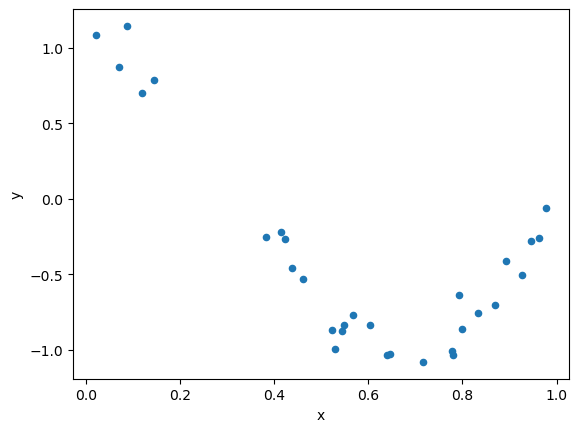

In [2]:
# Let's generate some fake data corresponding to our function
# True function is 1.5*pi
def true_fun(X):
    return np.cos(1.5 * np.pi * X)
# set seed to random numbers are always the same
np.random.seed(0)
# set the number of observations
n_samples = 30
# Generate X and y
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1
# store in a dataframe
df=pd.DataFrame({'x':X,'y':y})
#display(df.head()) # show head
# scatter the relationship between X and y in our "population"
df.plot.scatter('x','y')
plt.show()

## Finding the right function
- Say that you did not plot the data before estimating your function (sad!)
- Being trained as an economist your best guess is that the relationship between X and y is... linear!
- Let's find the line of best fit and compute the MSE.
- We will use [Scikit-learn](https://scikit-learn.org/stable/) tools 

In [3]:
import numpy as np
X_test = np.linspace(0, 1, 100)
X_test

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

 Estimated slope: -1.6093117914612283


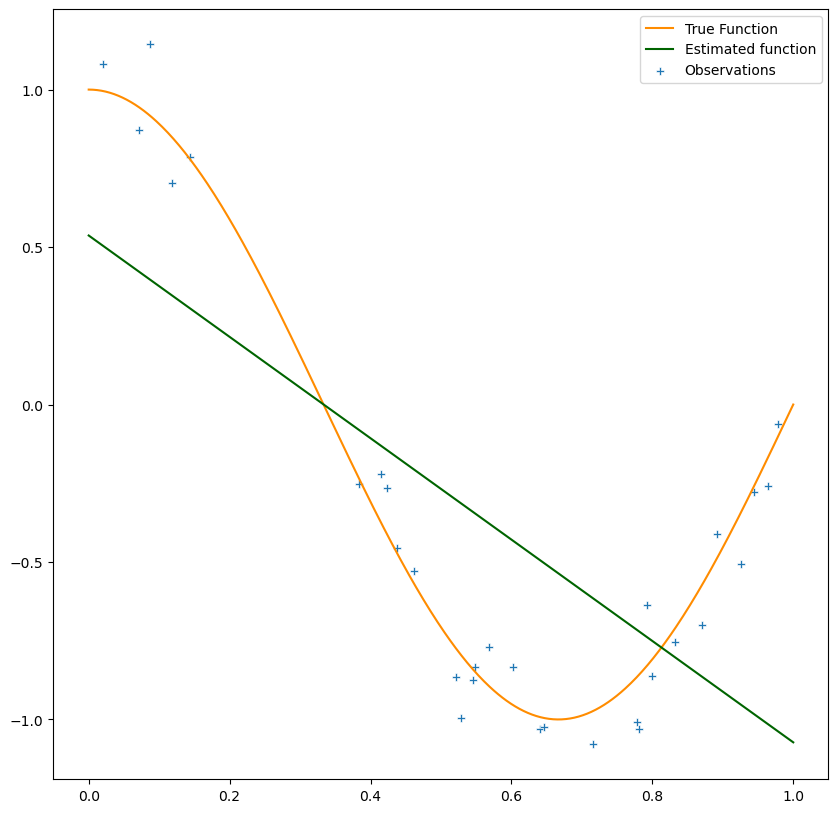

In [4]:
###### estimate the line of best fit and compare to the true function

### estimate the linear relationship between X and y
linear_regression = LinearRegression(fit_intercept=True) # initiate a linear regression class from scikit-learn LinearRegression
linear_regression.fit(df['x'].values.reshape(-1,1),y) # fit the data using this class; .reshape(-1, 1) allows to make is an (n,) vector

# Summary of the results
print(f" Estimated slope: {linear_regression.coef_[0]}")
def estimated_fun(x):
    return linear_regression.intercept_+ linear_regression.coef_[0]*x

# Create 500 equally spaced values for X between 0 and 1
X_test = np.linspace(0, 1, 500)
# predict values of y use X_test
y_pred=estimated_fun(X_test)

# initiate plot
fig, ax = plt.subplots(1,1, figsize=(10,10))
# plot the true function
sns.lineplot( x=X_test, y=true_fun(X_test),color='darkorange',label='True Function',ax=ax)
#plot the estimated (linear) relationship
sns.lineplot( x=X_test, y=y_pred,color='darkgreen',label='Estimated function',ax=ax)
# plot the scatter plot of the actual data
sns.scatterplot(x=X, y=y, label='Observations',ax=ax,marker="P")
plt.show()

## How good is this linear fit?
- Given the true function it was unlikely our line would give us a satisfying fit
- Let's see if we can improve on that
- but first what's our mean squared errors?

In [5]:
# Compare predicted to actual values for y
# create your own MSE function
def mse_fun(y,y_hat):
    """
    Take a y and a predicted y
    returns the MSE
    """
    diff_squared=np.square(y-y_hat)
    return np.mean(diff_squared)
# predict y using our estimated function, using our 30 observations
y_hat=estimated_fun(df['x'])   
# Print out our MSE
mse_degree1=mse_fun(y=y,y_hat=y_hat)
print(f"The MSE for the linear fit is {round(mse_degree1,3)}.")

The MSE for the linear fit is 0.226.


# Since we are talking about MSE
- By the way what do you expect the MSE for the true function is going to be?

In [6]:
# predict y, using the true function and our sample of 30 observations
y_pred_true_fun=true_fun(X)
# Compute the mean squared error of the true function using predicted values
mse_true_fun=mse_fun(y=y,y_hat=y_pred_true_fun)
print(f"The MSE for the linear fit is {round(mse_true_fun,3)}")

The MSE for the linear fit is 0.012


## Exercise: 
3: Why is the MSE of the true function not zero?

4: How do you expect the MSE of the true function to change as we increase the sample size N?





# New function
- How about we introduce the square of our unique variable
- This will generate a non linear relationship between X and y, and as we know this relationship is not linear
- Before:
$y_i = \beta_0+\beta_1 x_i$
- After:
$y_i= \beta_0+\beta_1 x_i + \beta_2 x_i^2$
- This is called a __quadratic regression__

In [7]:
# Create the square of x
df['x2']=df['x']**2
# reorder columns
df=df[['y','x','x2']]
df.head()

,y,x,x2
0,1.081908,0.020218,0.000409
1,0.870276,0.071036,0.005046
2,1.143862,0.087129,0.007592
3,0.703221,0.118274,0.013989
4,0.784947,0.143353,0.020550


In [8]:
# iniate a linear regression class
quad_regression = LinearRegression()
# fit parameters on x and x-squared to best predict y
quad_regression.fit(df.iloc[:,df.columns.str.contains('x')],df['y'])
 
print("***Estimated parameters:***")
print('Intercept:',round(quad_regression.intercept_,2))
print('\u03B2\u0302\u2081:',round(quad_regression.coef_[0],2))
print('\u03B2\u0302\u2082:',round(quad_regression.coef_[1],2))

***Estimated parameters:***
Intercept: 1.54
β̂₁: -7.32
β̂₂: 5.56


## Predict
- You don't have to create your own function each time!
- Scitkit-learn got you covered!
- Let's now predict for all values of X between 0 and 1 (note how it differs from the 30 observations we fitted our data on!)

In [9]:
# pred y based on the X_test and X_test squared
y_pred_x2_test= quad_regression.predict(np.array([X_test,X_test**2]).T) # test set
y_hat_x2 = quad_regression.predict(df[['x','x2']]) # use the results from quad_regression to predict y using our sample

/Users/jonathanholmes/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


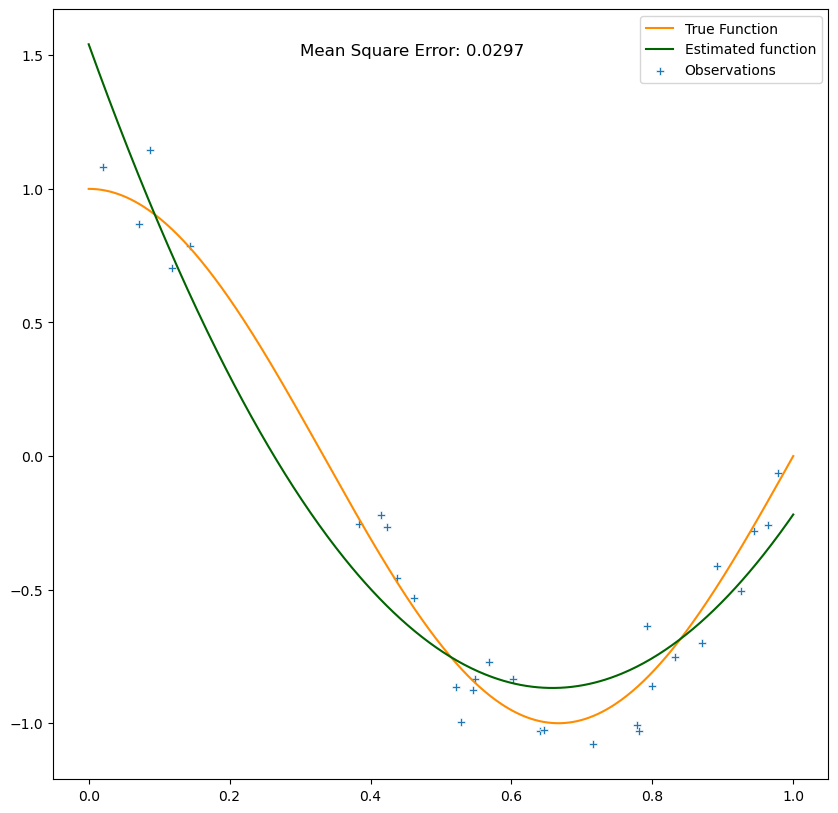

So adding a squared term improved our MSE from 0.2259 to 0.0297.
 This is much closer to the best MSE using the true function of 0.0125 

In [10]:
# initiate plot
fig, ax = plt.subplots(1,1, figsize=(10,10))
# plot the true function
sns.lineplot( x=X_test, y=true_fun(X_test),color='darkorange',label='True Function',ax=ax)
#plot the estimated (quadratic) relationship
sns.lineplot( x=X_test, y=y_pred_x2_test,color='darkgreen',label='Estimated function',ax=ax)
# plot the scatter plot of the actual data
mse_degree2=mse_fun(y=y,y_hat=y_hat_x2)
sns.scatterplot(x=X, y=y, label='Observations',ax=ax,marker="P")
ax.text(.3,1.5,f"Mean Square Error: {round(mse_degree2,4)}", fontsize=12)
plt.show()
md(f"So adding a squared term improved our MSE from {round(mse_degree1,4)} to {round(mse_degree2,4)}.\n This is much closer to the best MSE using the true function of {round(mse_true_fun,4)} ")


## Polynomial regression
- Clearly allowing for non-linearity went a long way in improving the fit
- What if we extended this function to higher and higher terms?
    - So far we used regressions of degree 1 and 2
    - We can extend this to any degree, this is called a polynomial regression
- A polynomial of degree n is given by:
$$f(x)=\beta_1 x^1 + \beta_2 x^2 + \beta_3 x^3 + ... +\beta_n x^n $$
$$ f(x)= \sum_1^n \beta_n x^n$$
- This yields the following model(s):
$$y_i= \beta_0 +\sum_1^n \beta_n x^n_i + \varepsilon_i$$

## Polynomials and MSE

- So what will happen to our MSE if we use higher and higher terms?
- Most likely we will allow for ever more __flexible functions__ of X to fit our data

- Want to try different polynomials?
- [Scitkit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) got you covered!
- In a loop let's try all polynomials from 1 to 15, save the corresponding MSE and see how it changes with degrees

In [11]:
MSE_list=[] # create empty list to store MSEs for each polynomial regression
MSE_list_test = []
y_test = true_fun(X_test) + np.random.randn(len(X_test)) * 0.1

polynomials=np.arange(1,16) # list of degrees
for n in polynomials:
    # prepocess the data
    polynomial_features =PolynomialFeatures(degree=n,include_bias=False) # initiate a class to get data of degree n without adding the constant term named bias in datascience. If you have read that far I have great feelings regarding your motivation. Case and point you are still reading even though there is no more information to be learned. That's it! In data science the interpect is called bias that's annoying but also now you know it and you can move on with your life. 
    X_train=polynomial_features.fit_transform(df['x'].values.reshape(-1, 1)) # get data of degree n, we now have n columns from a single column X
    # regression
    reg = LinearRegression() # initiate the regression class
    reg.fit(X_train,y) # fit the data
    # predict on the train data
    y_hat= reg.predict(X_train)
    # get MSE for the fitted data using the train data
    mse=mse_fun(y=y,y_hat=y_hat)
   
    # get MSE for the fitted data using the test data (explained later)
    X_test_pol=polynomial_features.fit_transform(X_test.reshape(-1,1))
    y_hat_test=reg.predict(X_test_pol)
    mse_test = mse_fun(y=y_test, y_hat=y_hat_test)
    
    # append the result to the loop
    MSE_list.append(mse)
    MSE_list_test.append(mse_test)

# put the results in dataframe
mse=pd.DataFrame({'Degree':polynomials, 'MSE':MSE_list, 'MSE_test':MSE_list_test})
mse[['Degree', 'MSE']].head()

,Degree,MSE
0,1,0.225892
1,2,0.029700
2,3,0.012483
3,4,0.011565
4,5,0.010973


- Let's now plot the relationship between polynomial degrees and our MSE score on our train data
- Recall that the best MSE, using the true function, was roughly 0.0125

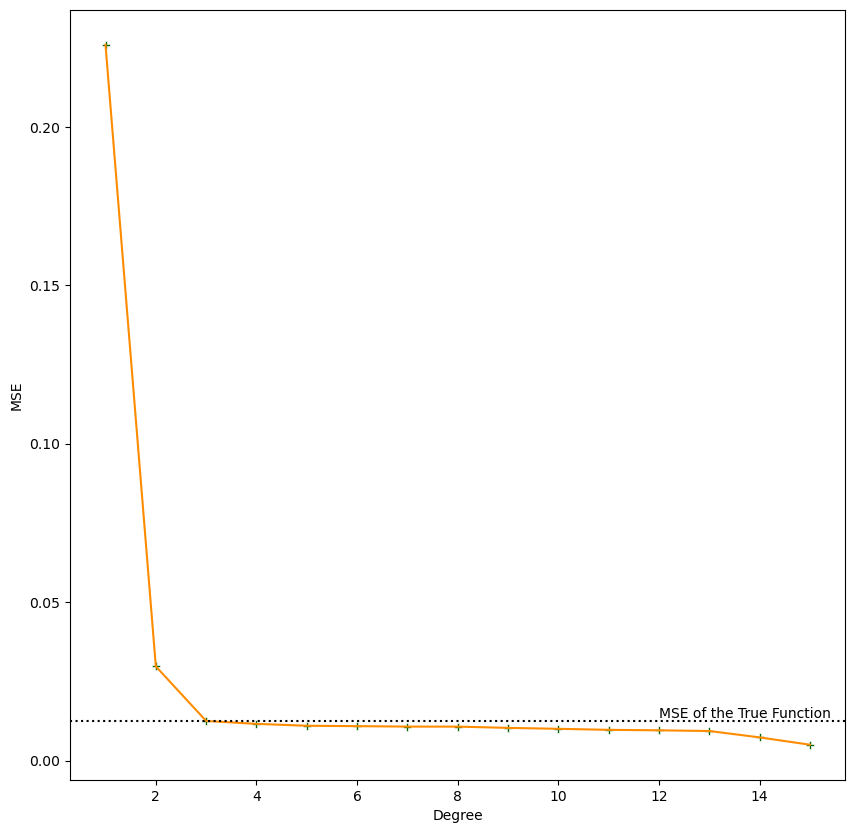

In [12]:
fig, ax=plt.subplots(1,1,figsize=(10,10))

sns.lineplot(data=mse, x='Degree',y='MSE',ax=ax, color='darkorange')
sns.scatterplot(data=mse, x='Degree',y='MSE',ax=ax, color='darkgreen',marker='P')
ax.axhline(y=mse_true_fun, color='k',linestyle=":")
ax.text(12,mse_true_fun+.001,"MSE of the True Function")

plt.show()

## Are higher degrees always better?
- It seems  higher and higher polynomials meant that we performed better than... the true function!
- Have we improved over the true function?
    - We did not
    - More importantly we should not
- Let's see why using our last estimated model (degree=15)

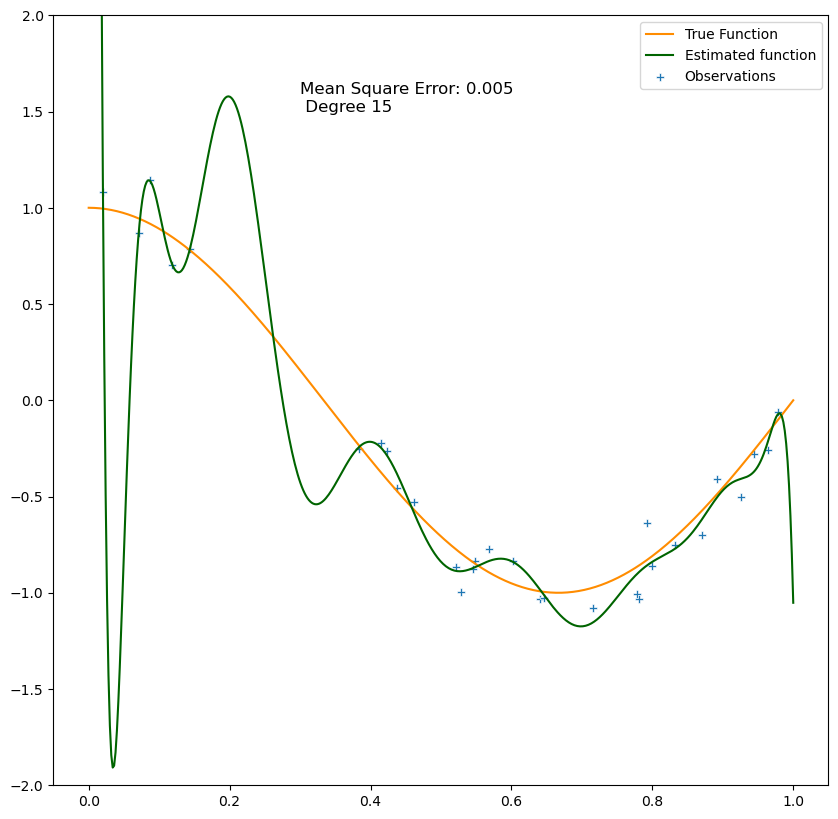

In [13]:
try: # make sure our last features are indeed of degree 15
    polynomial_features.degree==15
    X_test_n15=polynomial_features.fit_transform(X_test.reshape(-1,1)) # get data of degree n on a test data
    y_pred=reg.predict(X_test_n15) # predict on test data
    y_hat=reg.predict(X_train) # predict on train data
except:
    print(f"n is not 15 {polynomial_features}") # warn if try is wrong
# initiate plot
fig, ax = plt.subplots(1,1, figsize=(10,10))
# plot the true function
sns.lineplot( x=X_test, y=true_fun(X_test),color='darkorange',label='True Function',ax=ax)
#plot the estimated (quadratic) relationship
sns.lineplot( x=X_test, y=y_pred,color='darkgreen',label='Estimated function',ax=ax)
# plot the scatter plot of the actual data
sns.scatterplot(x=X, y=y, label='Observations',ax=ax,marker="P")
mse_degree15=round(mse_fun(y=y,y_hat=y_hat),4)
ax.text(.3,1.5,f"Mean Square Error: {mse_degree15}\n Degree {str(n)}", fontsize=12)
plt.ylim((-2, 2))

plt.show()

## Overfitting
- What we did here is called __overfitting__:
    - Given our dataset we fitted a function to pass very close to each observation $\{y_i,x_i\}$
- In our graph, the green line is very close to the points
- But when there is no points (observations) our prediction is very far from the true function
    - See for instance what you would predict for $x\approx 0.1$

## In-Sample vs. Out-of-Sample

- We are far because we found the function that maximizes __in sample prediction__
- Recall that our goal was instead to find the function $\hat{f}(x)$ that matches the true relationship between X and y 
- Why? Because we can then feed any x to  $\hat{f}(x)$, even one __out of sample__ and it should predict y closely
    - This is clearly not something our green line (polynomial of degree 15) is doing

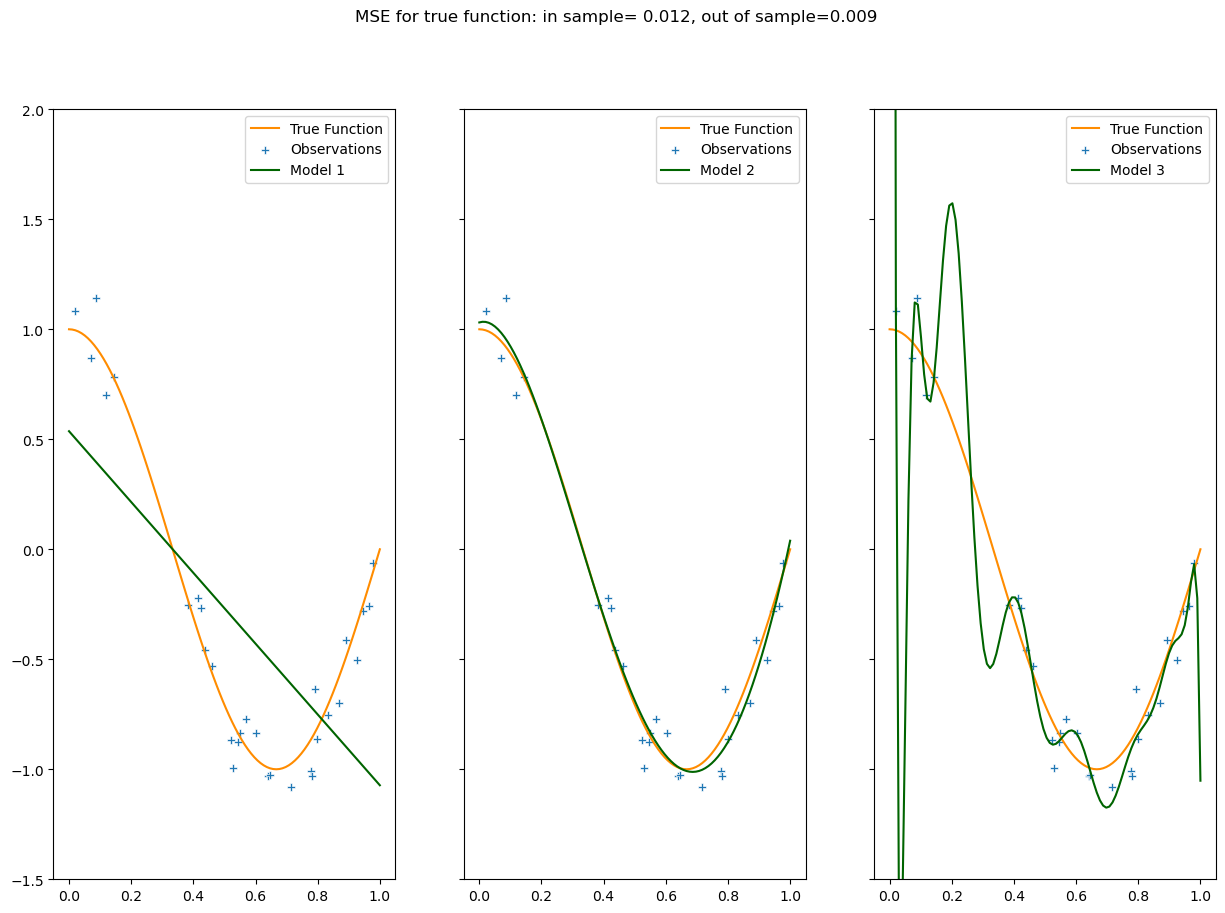

In [14]:
# initiate plot
fig, axes = plt.subplots(1,3, figsize=(15,10),sharey=True, sharex=True)

# create test target (out of sample)
X_test = np.linspace(0, 1, 100)
y_test = true_fun(X_test) + np.random.randn(len(X_test)) * 0.1

# Loop of three degrees
polynomials=[1,4,15] # list of degrees
for i,n in enumerate(polynomials): # i corresponds to the index (0, 1, 2); n takes the values in the polynomial list (1,4,15)
    
    # prepocess the data
    polynomial_features =PolynomialFeatures(degree=n,include_bias=False) # iniate a class to get data of degree n
    X_train=polynomial_features.fit_transform(df['x'].values.reshape(-1, 1)) # get data of degree n
    
    # regression
    reg = LinearRegression() # initiate the regression class
    reg.fit(X_train,y) # fit the data
    
    ### predict on the train and test data
    # in sample prediction
    y_hat_train= reg.predict(X_train) 
    # out of sample prediction
    X_test_pol=polynomial_features.fit_transform(X_test.reshape(-1,1))
    y_hat_test=reg.predict(X_test_pol)
    
    # get MSE for the fitted data using the train data
    mse_in_train=mse_fun(y=y,y_hat=y_hat_train)
    # get MSE for the fitted data using the test data
    mse_in_test=mse_fun(y=y_test,y_hat=y_hat_test)
    # get MSE for the true function using the train data
    mse_in_train_true_fun=mse_fun(y=y,y_hat=true_fun(X))
    # get MSE for the true function using the test data
    mse_in_test_true_fun=mse_fun(y=y_test,y_hat=true_fun(X_test))
    

    # plot the true function
    sns.lineplot( x=X_test, y=true_fun(X_test),color='darkorange',label='True Function',ax=axes[i])
    # plot the scatter plot of the actual data
    sns.scatterplot(x=X, y=y, label='Observations',marker="P",ax=axes[i])
    #plot the estimated function
    #sns.lineplot( x=X_test, y=y_hat_test,color='darkgreen',label=f'Polynomial of degree {n}',ax=axes[i])
    sns.lineplot( x=X_test, y=y_hat_test,color='darkgreen',label=f'Model {i+1}',ax=axes[i])
    # Display MSEs
    #axes[i].text(.3,1.5,f"In Sample MSE: {round(mse_in_train,3)}", fontsize=12)
    #axes[i].text(.3,1.4,f"Out of Sample MSE: {round(mse_in_test,3)}", fontsize=12)


plt.ylim((-1.5, 2))
fig.suptitle(f"MSE for true function: in sample= {round(mse_in_train_true_fun,3)}, out of sample={round(mse_in_test_true_fun,3)}")
plt.show()

# The Bias-Variance Trade-off

- In econometrics, we care about $\beta$
- In machine learning, we care about $\hat{y} = \hat{f}(x)$. 

_Bias_: 
- In econometrics, _bias_ is: $E[\hat{\beta}] - \beta$
- In ML, _bias_ refers to cases when the function $\hat{f}(x)$ is not flexible enough to approximate $f(x)$
- ML bias: How close can we approximate f in our given sample? 


_Variance_: 
- In econometrics, we care about $Var(\hat{\beta})$ 
- In ML, we care about $Var(\hat{f})$
- ML variance: How much does our function change when we use a different sample? 


## The Bias-Variance Trade-Off

If we make the model more complex: 
- $\hat{f}(x)$ can better approximate $f(x)$ $\rightarrow$ Bias goes ___
- There is more over-fitting to the current model $\rightarrow$ Variance goes ___

How do we determine the right balance between bias and variance? 





## Two Mean Squared Error Estimates: 
- _In sample MSE_ is the one you are used to and consists in finding the best fit given the available data
- _Out of sample MSE_ is the MSE if used on another dataset that was not used to estimate the model

In general, we want to choose model complexity to maximize _out of sample MSE_



## Train vs Test

Note: In our current in-class exercise, we know $f(x)$. In general, we don't. 

How can we measure the out of sample MSE in the real world?

Solution: Split the data in two
- Training data: Used to estimate the parameters of the model
- Test data: Used to measure out-of-sample Mean-Squared Error

In [ ]:
fig, ax=plt.subplots(1,1,figsize=(10,10))

mse_small = mse[mse['Degree']<=13]

sns.lineplot(data=mse_small, x='Degree',y='MSE',ax=ax, color='darkorange', label="Train MSE")
sns.scatterplot(data=mse_small, x='Degree',y='MSE',ax=ax, color='darkgreen',marker='P')
sns.lineplot(data=mse_small, x='Degree', y='MSE_test', ax=ax, color='darkblue', label="Test MSE")

ax.axhline(y=mse_true_fun, color='k',linestyle=":")
ax.text(10,mse_true_fun+.001,"MSE of the True Function")

plt.show()

## In-Class Exercise: 

#5: What degree of polinomial would you choose to give the best predictions $\hat{y}$ in this example? 